# DBScan 

- DB: Density based Algorithm

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

import seaborn as sn

# Load the data


In [2]:
df = pd.read_csv("./data/data.csv")

df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plot some data

Text(0, 0.5, 'Income')

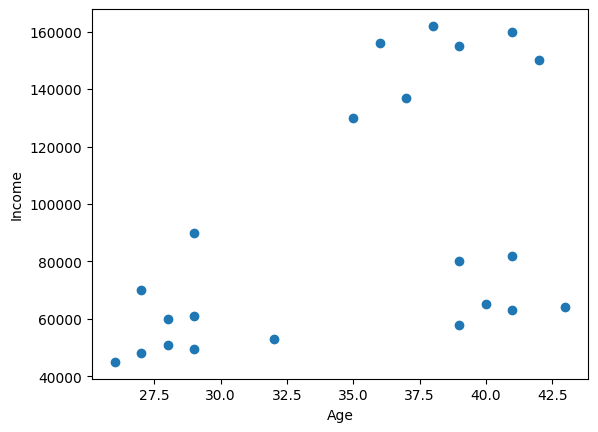

In [3]:
plt.scatter(df["Age"], df["Income"])
plt.xlabel("Age")
plt.ylabel("Income")

# Normalize the data

In [4]:
# create a scaler
scaler = MinMaxScaler(feature_range= (0,1)) # feature_range between 0 and 1


# Scale the age
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])


# Scale the income
scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])




df.head(15)

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


# Build and train the model

In [11]:
# create the model instance
model = DBSCAN(eps = 0.4, min_samples= 3)

# Train the model (fit) and assign the clusters to rows (predict)
y_predicted  = model.fit_predict(df[["Age", "Income"]])

y_predicted

array([0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [12]:
# Attach the cluster column to df 
df["cluster"] = y_predicted 

df.sort_values("cluster", inplace= True)

df.head(10)

,Name,Age,Income,cluster
1,Michael,0.176471,0.384615,0
0,Rob,0.058824,0.213675,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
15,Ranbir,0.352941,0.068376,0
14,Stark,0.176471,0.038462,0
13,Jared,0.117647,0.051282,0
12,Arnold,0.058824,0.025641,0
11,Tom,0.000000,0.000000,0
19,Alia,0.764706,0.299145,1


# Plot the clusters

<Axes: xlabel='Age', ylabel='Income'>

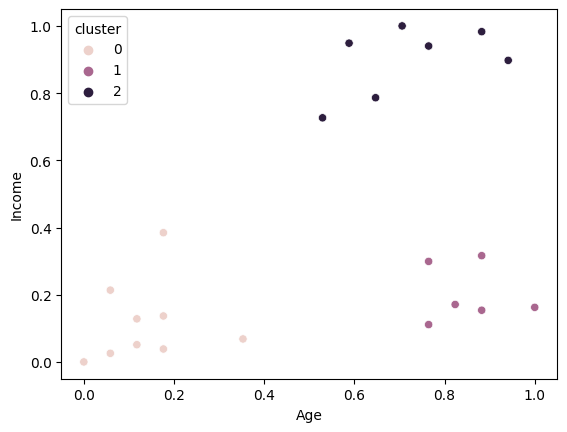

In [13]:
sn.scatterplot(x = df["Age"], y = df["Income"], hue = df["cluster"])